# Tarea 5
Integrantes: Benavides Patricio - Paguay Diana

## Walmart Dataset

La base con la que trabajaremos este caso  práctico contiene información sobre datos históricos de las ventas de Walmart desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:
- tienda: el número de la tienda.
- fecha: la semana de ventas
- Weekly_Sales: ventas para la tienda dada.
- Holiday_Flag: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva.
- temperatura: temperatura el día de la venta.
- Fuel_price: costo del combustible en la región. 
- IPC: índice de precios al consumidor vigente. 
- desempleo: tasa de desempleo predominante. 

Eventos festivos
- Super bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013\ 
- Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13\
- Acción de Gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13\
- Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13

## 1. Importe la base de datos a una base en Jupyter Notebook con pandas.

In [508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

from matplotlib import dates
from datetime import datetime

In [509]:
import warnings
warnings.filterwarnings("ignore")

In [558]:
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

from scipy import stats

In [511]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## 2. Obtenga los descriptivos resumen de la base de datos e identifique las variables numéricas y categóricas. Indique, ¿hay algo que le llame la atención?

In [512]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [513]:
df.rename({'Store':'tienda', 'Date':'fecha','Weekly_Sales': 'ventas_sem','Holiday_Flag':'dia_festivo','Temperature':'temperatura','Fuel_Price':'precio_comb','Unemployment':'desempleo','CPI':'cpi'}, axis=1, inplace=True)
df

,tienda,fecha,ventas_sem,dia_festivo,temperatura,precio_comb,cpi,desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [514]:
df.describe()

,tienda,ventas_sem,dia_festivo,temperatura,precio_comb,cpi,desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tienda       6435 non-null   int64  
 1   fecha        6435 non-null   object 
 2   ventas_sem   6435 non-null   float64
 3   dia_festivo  6435 non-null   int64  
 4   temperatura  6435 non-null   float64
 5   precio_comb  6435 non-null   float64
 6   cpi          6435 non-null   float64
 7   desempleo    6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


La variable temperatura está en grados Fahrenheit, con un valor mínimo de 2 grados con un máximo de 100 grados. Para nuestro caso podría ser conveniente convertir a grados celsius.
Por otra parte la variable fecha hay que convertirla a formato de fecha para el correcto análisis.

## Corrección de formato de temperatura y fecha

In [516]:
#Conversión de temperatura a grados Celsius
df.temperatura = (df.temperatura - 32) * 5.0/9.0
df.rename({'temperatura':'temp_celsius'}, axis=1, inplace=True)

In [517]:
df.describe()

,tienda,ventas_sem,dia_festivo,temp_celsius,precio_comb,cpi,desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,15.924324,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,10.247185,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-18.922222,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,8.588889,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,17.038889,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,23.855556,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,37.855556,4.468000,227.232807,14.313000


Esta sería la base con la temperatura modificada a grados Celsius.

Para el análisis la variable fecha debería estar en formato de fecha, en lugar de objeto. 

In [518]:
#Conversión de columna fecha a formato de fecha
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)

In [519]:
#df.fecha
df.fecha[0]

Timestamp('2010-02-05 00:00:00')

In [520]:
df.describe()

,tienda,ventas_sem,dia_festivo,temp_celsius,precio_comb,cpi,desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,15.924324,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,10.247185,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-18.922222,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,8.588889,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,17.038889,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,23.855556,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,37.855556,4.468000,227.232807,14.313000


## Análisis de datos

Según el descriptivo podemos mencionar que, la base está compuesta por 7 variables numéricas: número de tienda, ventas semanales, identificación de día festivo, temperatura, precio del combustible, índice de precios al consumidor vigente CPI y la tasa de desempleo. Todas las columnas cuentas con 6435 filas por lo que al parecer no hay datos perdidos.
De los datos apreciamos que hay un total de 45 tiendas. La columna de ventas semanales (ventas_sem) son valores de 7 cifras por lo que puede ser conveniente realizar el logaritmo para mejor tratamiento de los datos. Los días festivos están por debajo del 25%.  La variable temperatura (temp_celsius) ya está en grados celsius, con un valor mínimo de -18.92 grados y con un máximo de 37.86 grados. El precio del combustible ha variado desde 2.47 USD hasta un máximo de 4.47 USD por galón con una media de 3.36 USD. El índice de precios varía desde 126.06 hasta 227.23 con una media de 171.58. La tasa de desempleo varía desde 3.88 hasta 14.31 con una media de 7.99.
Por otra parte de la variable "fecha", notamos 143 fechas distintas lo que indica que el análisis se concentra en un rango de 143 semanas a partir del 5-Feb-2010 hasta el 26-Oct-2012.

## 3. Evalúe si la base contiene datos perdidos. 

In [521]:
df.isna().sum()

tienda          0
fecha           0
ventas_sem      0
dia_festivo     0
temp_celsius    0
precio_comb     0
cpi             0
desempleo       0
dtype: int64

In [522]:
df.duplicated().any()

False

Aplicando el comando respectivo, confirmamos que no existen valores perdidos, ni filas duplicadas. Así lo verificamos en el paso anterior porque todas las variables tienen 6435 filas.

## 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso detalle cuáles y qué método estadístico aplicaran para corregir. 

In [523]:
df.tienda.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

La variable "tienda" tiene valores entre 1 y 45 sin saltarse ninguna ni tampoco valores atípicos. 

In [524]:
df.dia_festivo.unique()

array([0, 1], dtype=int64)

Como era de esperarse, la columna dia_festivo solo tiene 2 únicos valores.

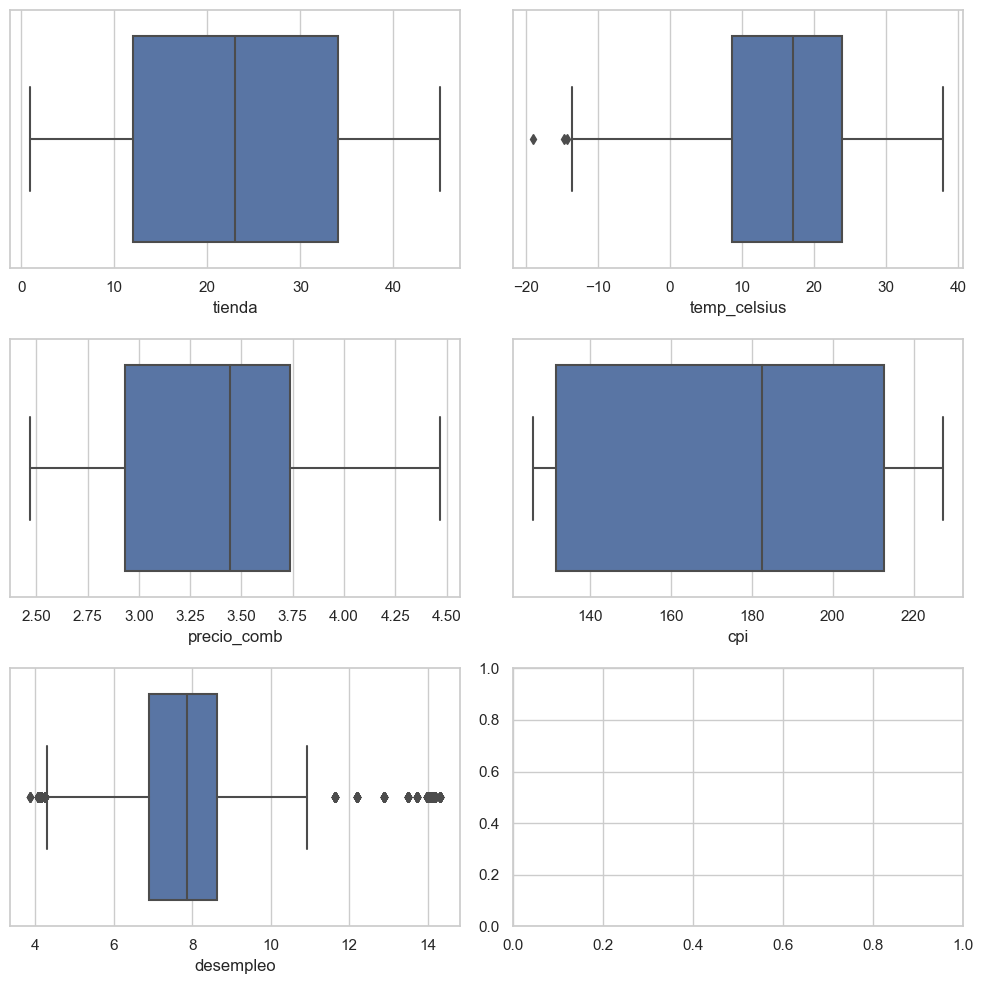

In [525]:
# Box plots
fig, axs = plt.subplots(3,2, figsize = (10,10))
plt1 = sns.boxplot(df.tienda, ax = axs[0,0])
#plt2 = sns.boxplot(df.ventas_sem, ax = axs[0,1])
plt2 = sns.boxplot(df.temp_celsius, ax = axs[0,1])
plt1 = sns.boxplot(df.precio_comb, ax = axs[1,0])
plt2 = sns.boxplot(df.cpi, ax = axs[1,1])
plt1 = sns.boxplot(df.desempleo, ax = axs[2,0])
plt.tight_layout()
plt.show()

De la gráfica de boxplot, podemos notar que las variables que requieren el tratamiento de valores extremos es temp_celsius y desempleo.

Para las demás variables no se requiere tratamiento puesto que no muestran datos atípicos. Observemos la distribución de las variables a tratar:

<AxesSubplot:xlabel='desempleo', ylabel='Density'>

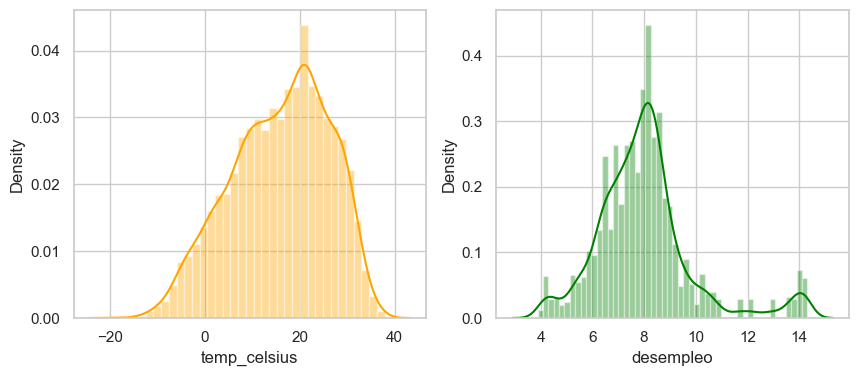

In [526]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.distplot(df['temp_celsius'],color="orange")

plt.subplot(1,2,2)
sns.distplot(df['desempleo'],color="green")

Las distribuciones estan sesgadas hacia un extremo. Como no tienden a una distribución normal, procedemos a tratarlas con el método del rango intercuartil. Realizaremos el tratamiento a la variable temp_celsius

In [527]:
# Calculamos el Quartil 1 y Quartil 3 de la variable temp_celsius
Q1TC = df['temp_celsius'].quantile(0.25)
Q3TC = df['temp_celsius'].quantile(0.75)
IQR_temp_celsius = Q3TC - Q1TC  #rango intercuartil
print(IQR_temp_celsius)

15.266666666666667


In [528]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['temp_celsius'] < (Q1TC - 1.5 * IQR_temp_celsius)) |(df['temp_celsius'] > (Q3TC + 1.5 * IQR_temp_celsius)))]
df.shape

(6432, 8)

Finalmente, la variable desempleo

In [529]:
# Calculamos el Quartil 1 y Quartil 3 de la variable temp_celsius
Q1DES = df['desempleo'].quantile(0.25)
Q3DES = df['desempleo'].quantile(0.75)
IQR_desempleo = Q3DES - Q1DES  #rango intercuartil
print(IQR_desempleo)

1.7309999999999999


In [530]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['desempleo'] < (Q1DES - 1.5 * IQR_desempleo)) |(df['desempleo'] > (Q3DES + 1.5 * IQR_desempleo)))]
df.shape

(5951, 8)

## 5. Grafique las distribuciones de las variables y a priori comente sobre ellas. 

<AxesSubplot:xlabel='desempleo', ylabel='Density'>

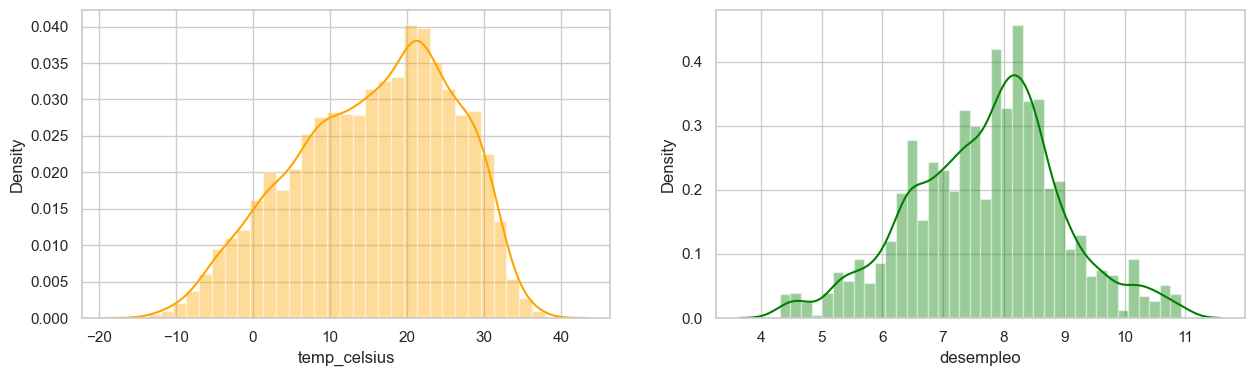

In [531]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.distplot(df.temp_celsius,color="orange")

plt.subplot(1,2,2)
sns.distplot(df.desempleo,color="green")

<AxesSubplot:xlabel='cpi', ylabel='Density'>

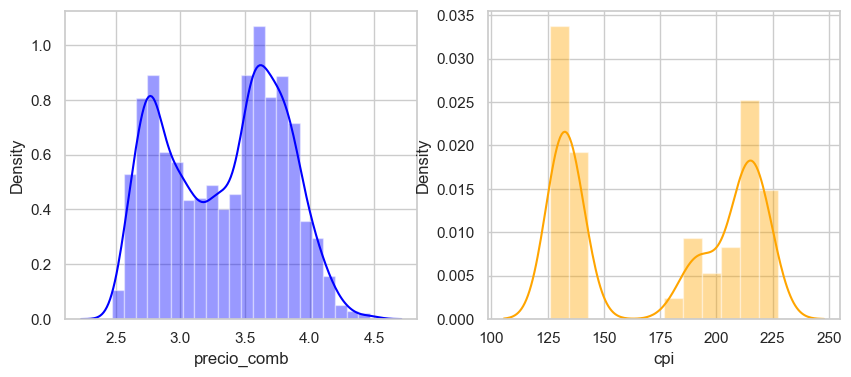

In [532]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df.precio_comb,color="blue")

plt.subplot(1,2,2)
sns.distplot(df.cpi,color="orange")

Con el ajuste realizado anteriormente, podemos notar que las variables temp_celsius y desempleo siguen una distribución casi normal. Las variables se muestran en diferentes intervalos.

## 6. Obtenga las correlaciones entre los datos de corte numérico 

In [536]:
anios = dates.YearLocator()
mes = dates.MonthLocator()
anios_format = dates.DateFormatter('%b %Y')

df['fecha'] = pd.to_datetime(df['fecha'], format = '%d-%m-%Y')

#Para la variable ventas semanales vamos a presentarla como 1K
df['ventas_sem'] = round(df['ventas_sem'] / 1000, 3)
df['cpi'] = round(df['cpi'], 2)
df['temp_celsius'] = round(df['temp_celsius'], 2)
df2 = df.copy()

#build panel data sorting by store and date
df2 = df2.sort_values(by = 'fecha')
panel = pd.pivot_table(df2, values = ['ventas_sem', 'dia_festivo', 'temp_celsius',
       'precio_comb', 'cpi', 'desempleo'], index = ['tienda', 'fecha']).reset_index()
panel['anios'] = panel['fecha'].dt.month
panel['mes'] = panel['fecha'].dt.year

panel

,tienda,fecha,cpi,desempleo,dia_festivo,precio_comb,temp_celsius,ventas_sem,anios,mes
0,1,2010-02-05,211.10,8.106,0,2.572,5.73,1643.691,2,2010
1,1,2010-02-12,211.24,8.106,1,2.548,3.62,1641.957,2,2010
2,1,2010-02-19,211.29,8.106,0,2.514,4.41,1611.968,2,2010
3,1,2010-02-26,211.32,8.106,0,2.561,8.13,1409.728,2,2010
4,1,2010-03-05,211.35,8.106,0,2.625,8.06,1554.807,3,2010
...,...,...,...,...,...,...,...,...,...,...
5946,45,2012-09-28,192.01,8.684,0,3.997,18.27,713.174,9,2012
5947,45,2012-10-05,192.17,8.667,0,3.985,18.27,733.455,10,2012
5948,45,2012-10-12,192.33,8.667,0,4.000,12.48,734.464,10,2012
5949,45,2012-10-19,192.33,8.667,0,3.969,13.59,718.126,10,2012


In [537]:
panel.drop(['tienda', 'anios', 'mes'], axis = 1).describe()

,cpi,desempleo,dia_festivo,precio_comb,temp_celsius,ventas_sem
count,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000
mean,174.934875,7.720502,0.070240,3.339541,15.732368,1051.010557
std,39.028423,1.242707,0.255573,0.457431,10.230388,572.291691
min,126.060000,4.308000,0.000000,2.472000,-13.630000,209.986000
25%,132.760000,6.891000,0.000000,2.891000,8.220000,554.065000
50%,189.840000,7.852000,0.000000,3.417000,16.890000,951.550000
75%,213.760000,8.494000,0.000000,3.720000,23.705000,1436.634000
max,227.230000,10.926000,1.000000,4.468000,37.860000,3818.686000


In [538]:
panel.head()

,tienda,fecha,cpi,desempleo,dia_festivo,precio_comb,temp_celsius,ventas_sem,anios,mes
0,1,2010-02-05,211.10,8.106,0,2.572,5.73,1643.691,2,2010
1,1,2010-02-12,211.24,8.106,1,2.548,3.62,1641.957,2,2010
2,1,2010-02-19,211.29,8.106,0,2.514,4.41,1611.968,2,2010
3,1,2010-02-26,211.32,8.106,0,2.561,8.13,1409.728,2,2010
4,1,2010-03-05,211.35,8.106,0,2.625,8.06,1554.807,3,2010


In [539]:
pivot_table = pd.pivot_table(panel, values = ['ventas_sem', 'temp_celsius', 'precio_comb', 'cpi', 'desempleo'], 
                             index = 'fecha', aggfunc = {'ventas_sem': np.sum, 'temp_celsius': np.mean, 'precio_comb': np.mean,
                                                        'cpi': np.mean, 'desempleo': np.mean}).reset_index()
pivot_table['mes'] = pivot_table['fecha'].dt.month
pivot_table['anio'] = pivot_table['fecha'].dt.year
pivot_table.head()

,fecha,cpi,desempleo,precio_comb,temp_celsius,ventas_sem,mes,anio
0,2010-02-05,170.679048,8.236762,2.700405,0.519762,46619.847,2,2010
1,2010-02-12,170.778810,8.236762,2.676024,0.650476,45317.630,2,2010
2,2010-02-19,170.826905,8.236762,2.654714,2.498571,45363.036,2,2010
3,2010-02-26,170.864762,8.236762,2.673857,3.587857,41043.559,2,2010
4,2010-03-05,170.904048,8.236762,2.712929,5.634762,43813.776,3,2010


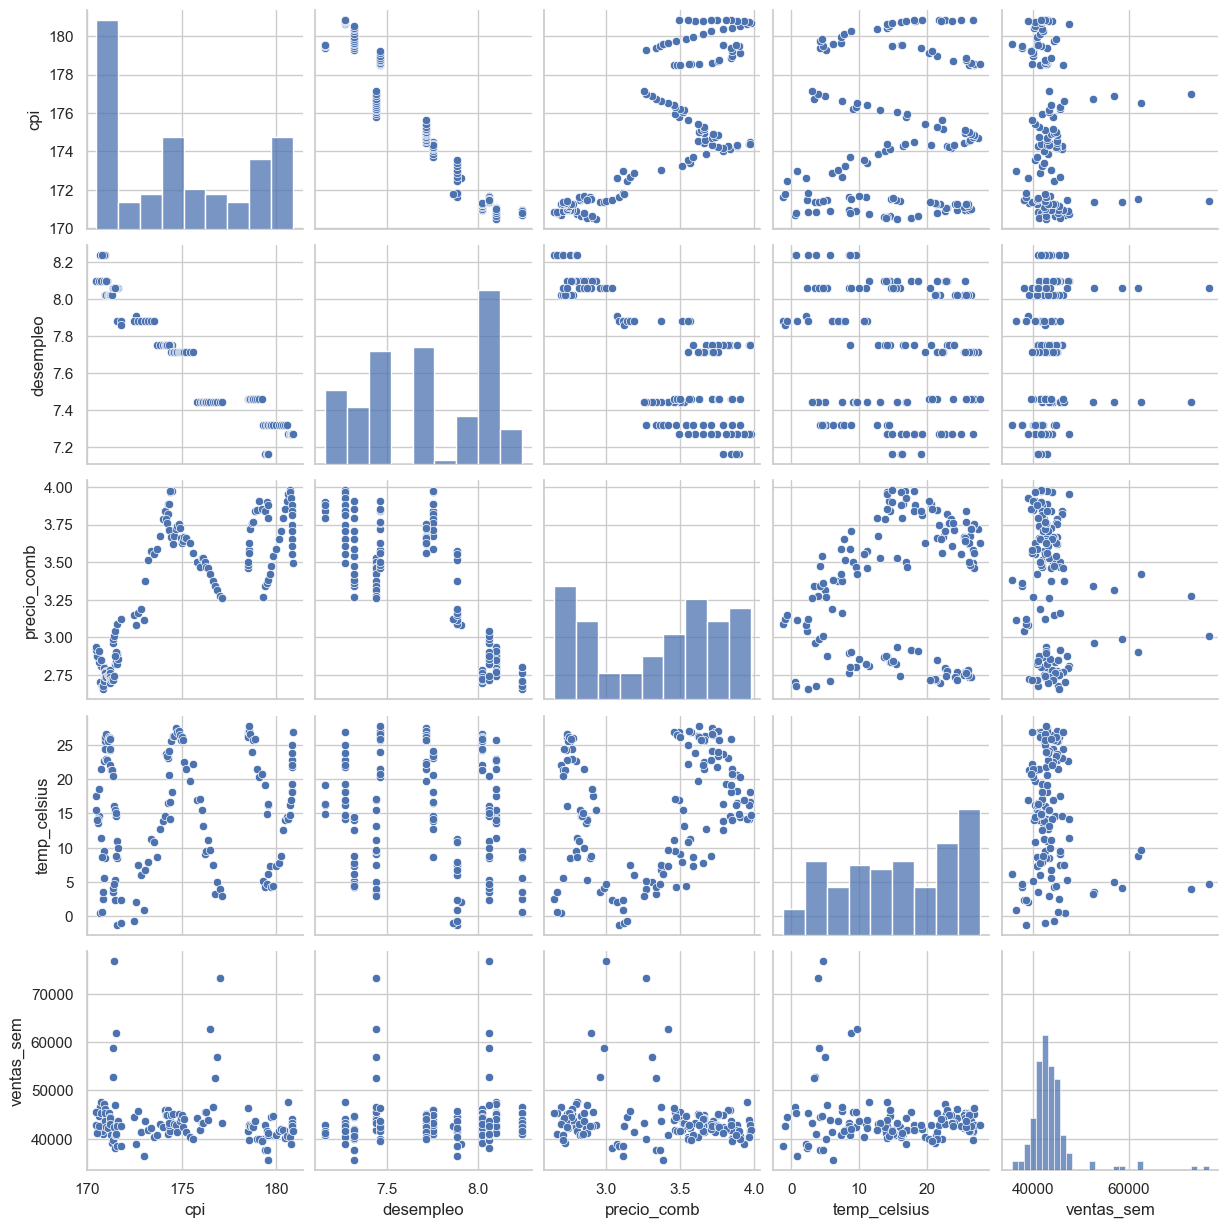

In [540]:
sns.pairplot(pivot_table.drop(['mes','anio'],axis = 1))

In [541]:
pivot_table.drop(['mes', 'anio'], axis = 1).corr()

,cpi,desempleo,precio_comb,temp_celsius,ventas_sem
cpi,1.000000,-0.970189,0.787547,0.126552,-0.156861
desempleo,-0.970189,1.000000,-0.797590,-0.111979,0.120421
precio_comb,0.787547,-0.797590,1.000000,0.227070,-0.154635
temp_celsius,0.126552,-0.111979,0.227070,1.000000,-0.160708
ventas_sem,-0.156861,0.120421,-0.154635,-0.160708,1.000000


Podemos interpretar que las ventas tienen menor correlación con los datos macroeconómicos. La posible razón puede darse a que usamos datos semanales y las variables macroeconómicas como el cpi y desempleo tiene cambios pequeños a corto plazo.

## 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

La variable dependiente es ventas semanales, la variable numérica ventas_sem. El objetivo es determinar la relación que existe entre otras variables.
A nuestro modelo se introducirán las variables numéricas cpi, desempleo, precio de combustible (precio_comb) y la temperatura.

## 8. Indique que tipo de modelación realizarán y porqué.

Los datos del panel se usan cuando el conjunto de datos tiene información con respecto a una dimensión de tiempo T y una dimensión de unidad i (por ejemplo, empresa, individuo, grupo, etc. Tenemos N grupos).

En el conjunto de datos en análisis, se realiza un seguimiento de cada tienda (la "unidad") durante la misma cantidad de períodos de tiempo, entre el año 2010 al 2012, lo que da como resultado lo que se denomina un panel equilibrado.

Además, es un panel fijo porque estamos rastreando el mismo conjunto de 45 tiendas en cada período de tiempo.

Una de las ventajas que presentan los modelos con datos de panel es que proporcionan una mayor cantidad de información, más variabilidad, menos colinealidad entre variables y una mayor precisión.

En el análisis se debe determinar cuál de los modelos aplicar entre el método de regresión OLS,de efectos fijos o de efectos aleatorios.

## 9. Verifique los supuestos, de haber escogido el enfoque econométrico.

In [542]:
panel

,tienda,fecha,cpi,desempleo,dia_festivo,precio_comb,temp_celsius,ventas_sem,anios,mes
0,1,2010-02-05,211.10,8.106,0,2.572,5.73,1643.691,2,2010
1,1,2010-02-12,211.24,8.106,1,2.548,3.62,1641.957,2,2010
2,1,2010-02-19,211.29,8.106,0,2.514,4.41,1611.968,2,2010
3,1,2010-02-26,211.32,8.106,0,2.561,8.13,1409.728,2,2010
4,1,2010-03-05,211.35,8.106,0,2.625,8.06,1554.807,3,2010
...,...,...,...,...,...,...,...,...,...,...
5946,45,2012-09-28,192.01,8.684,0,3.997,18.27,713.174,9,2012
5947,45,2012-10-05,192.17,8.667,0,3.985,18.27,733.455,10,2012
5948,45,2012-10-12,192.33,8.667,0,4.000,12.48,734.464,10,2012
5949,45,2012-10-19,192.33,8.667,0,3.969,13.59,718.126,10,2012


In [544]:
panel_data = panel.set_index(['tienda', 'fecha'])
dates = panel_data.index.get_level_values('fecha').to_list()
panel_data['fecha'] = pd.Categorical(dates)
panel_data.drop(['mes', 'anios','dia_festivo'], axis = 1, inplace = True)
panel_data

cpi  desempleo  precio_comb  temp_celsius  ventas_sem  \
tienda fecha                                                                  
1      2010-02-05  211.10      8.106        2.572          5.73    1643.691   
       2010-02-12  211.24      8.106        2.548          3.62    1641.957   
       2010-02-19  211.29      8.106        2.514          4.41    1611.968   
       2010-02-26  211.32      8.106        2.561          8.13    1409.728   
       2010-03-05  211.35      8.106        2.625          8.06    1554.807   
...                   ...        ...          ...           ...         ...   
45     2012-09-28  192.01      8.684        3.997         18.27     713.174   
       2012-10-05  192.17      8.667        3.985         18.27     733.455   
       2012-10-12  192.33      8.667        4.000         12.48     734.464   
       2012-10-19  192.33      8.667        3.969         13.59     718.126   
       2012-10-26  192.31      8.667        3.882         14.92     760.281   

                       fecha  
tienda fecha                  
1      2010-02-05 2010-02-05  
       2010-02-12 2010-02-12  
       2010-02-19 2010-02-19  
       2010-02-26 2010-02-26  
       2010-03-05 2010-03-05  
...                      ...  
45     2012-09-28 2012-09-28  
       2012-10-05 2012-10-05  
       2012-10-12 2012-10-12  
       2012-10-19 2012-10-19  
       2012-10-26 2012-10-26  

[5951 rows x 6 columns]

## Método Regresión OLS

In [561]:
#Variables dependiente (y) e independientes (X)
independiente = sm.tools.tools.add_constant(panel_data[['temp_celsius', 'precio_comb', 'cpi', 'desempleo']])
dependiente = panel_data['ventas_sem']

#fitting variable into panel OLS method
model = PooledOLS(dependiente, independiente)
pooledOLS_res = model.fit(cov_type='clustered', cluster_entity=True)

predicciones_pooled_OLS = pooledOLS_res.predict().fitted_values
residuos_pooled_OLS = pooledOLS_res.resids

In [562]:
pooledOLS_res

Dep. Variable:,ventas_sem,R-squared:,0.0183
Estimator:,PooledOLS,R-squared (Between):,0.0258
No. Observations:,5951,R-squared (Within):,0.0150
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0183
Time:,07:09:33,Log-likelihood,-4.618e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,27.711
Entities:,45,P-value,0.0000
Avg Obs:,132.24,Distribution:,"F(4,5946)"
Min Obs:,17.000,,
Max Obs:,143.00,F-statistic (robust):,0.4335


El R-cuadrado ajustado que mide la fracción de la varianza total en "y" que es explicada por "X" después de tener en cuenta los grados de libertad perdidos debido a la inclusión de variables de regresión es 0.01, bastante bajo.

La prueba F para la regresión que mide la significación conjunta de los parámetros del modelo ha producido una estadística de prueba de 27.71 con un valor p de 0, lo que nos lleva a concluir que las estimaciones del coeficiente del modelo son significativas en conjunto con una p < 0.005.

Sin embargo, para la prueba F robusta se tiene un valor de p-value mayor que 0.05, con 0.7845.

El Log-verosimilitud del modelo es -46180. Este valor de bondad de ajuste por sí mismo no es repesentativo a menos que lo comparemos con los de un modelo alternativo, por lo que a seguir validamos los supuestos de homocedasticidad y no-autocorrelación.

Para elegir entre los métodos de regresión PooledOLS, Fixed Effect y Random Effect debemos analizar los supuestos de heteroscedasticidad y autocorrelación. Si no se cumplen los dos supuestos con PooledOLS, entonces podemos considerar los modelos de efectos fijos y el de efectos aleatorios..

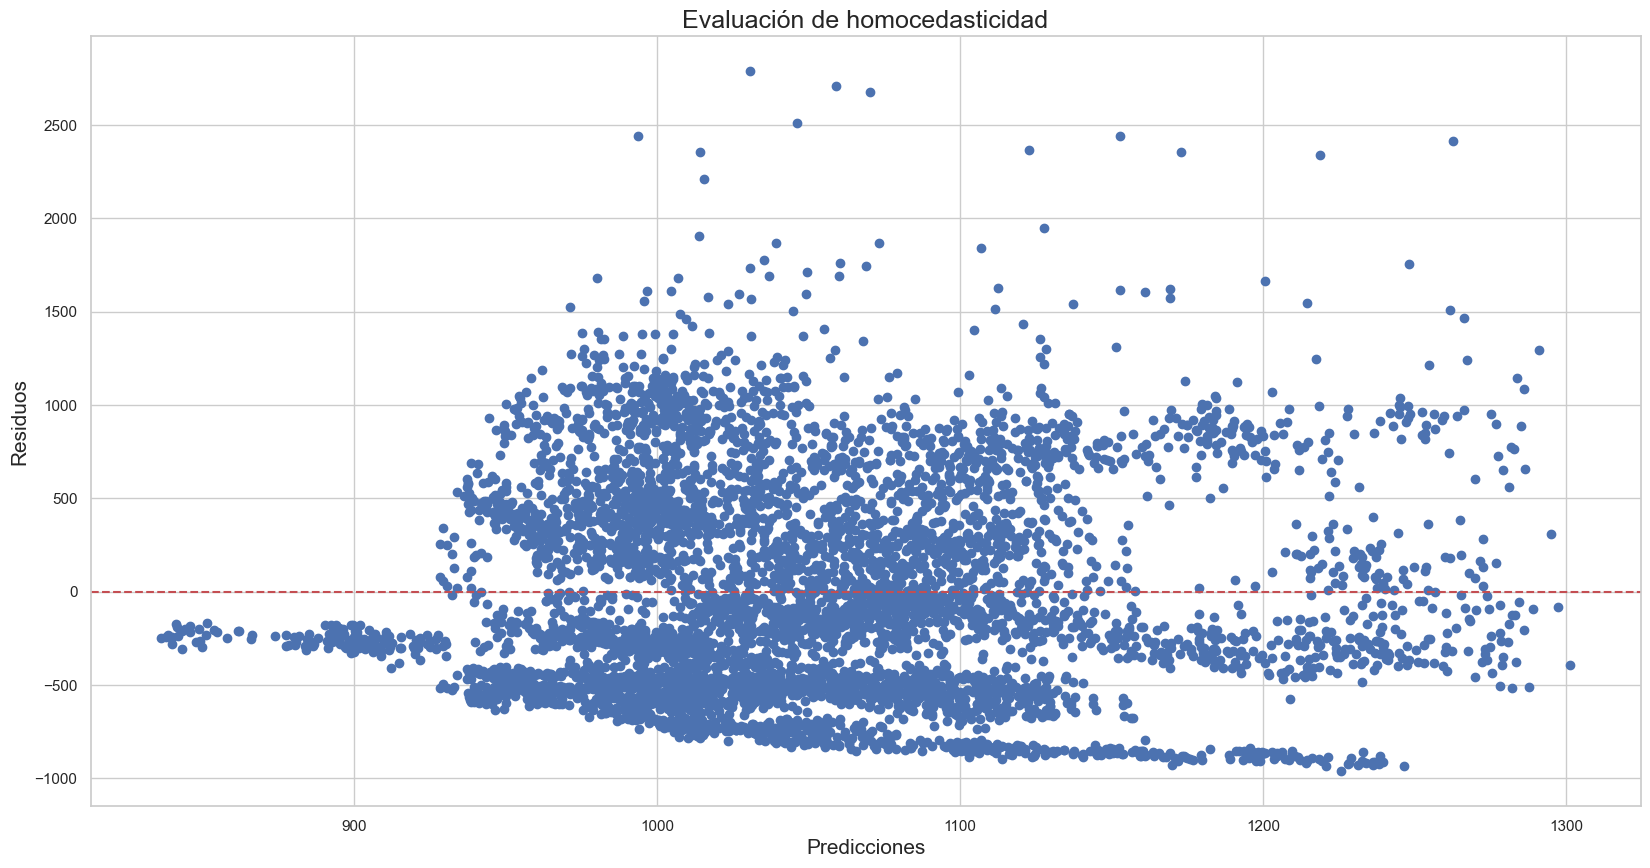

In [564]:
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS, residuos_pooled_OLS)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

De la gráfica, y como los puntos se dispersan, tenemos un indicador de varianza creciente y, por lo tanto, de heteroscedasticidad. Comprobemos esta intuición gráfcia con el test de Breusch-Pagan:

In [567]:
pooled_OLS_df = pd.concat([panel_data, residuos_pooled_OLS], axis = 1)
pooled_OLS_df = pooled_OLS_df.drop(['fecha'], axis = 1).fillna(0)
X_ = sm.tools.tools.add_constant(panel_data['ventas_sem']).fillna(0)

In [568]:
pooled_OLS_df

cpi  desempleo  precio_comb  temp_celsius  ventas_sem  \
tienda fecha                                                                  
1      2010-02-05  211.10      8.106        2.572          5.73    1643.691   
       2010-02-12  211.24      8.106        2.548          3.62    1641.957   
       2010-02-19  211.29      8.106        2.514          4.41    1611.968   
       2010-02-26  211.32      8.106        2.561          8.13    1409.728   
       2010-03-05  211.35      8.106        2.625          8.06    1554.807   
...                   ...        ...          ...           ...         ...   
45     2012-09-28  192.01      8.684        3.997         18.27     713.174   
       2012-10-05  192.17      8.667        3.985         18.27     733.455   
       2012-10-12  192.33      8.667        4.000         12.48     734.464   
       2012-10-19  192.33      8.667        3.969         13.59     718.126   
       2012-10-26  192.31      8.667        3.882         14.92     760.281   

                     residual  
tienda fecha                   
1      2010-02-05  635.671329  
       2010-02-12  629.624122  
       2010-02-19  600.964499  
       2010-02-26  406.789285  
       2010-03-05  552.423526  
...                       ...  
45     2012-09-28 -257.601110  
       2012-10-05 -237.961455  
       2012-10-12 -248.298139  
       2012-10-19 -262.702033  
       2012-10-26 -218.767638  

[5951 rows x 6 columns]

In [569]:
#verificar heteroscedasticidad.
breusch_pagan_test = list(het_breuschpagan(pooled_data['residual'], X_))
label_aut = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
result_auto = pd.Series(breusch_pagan_test, index = label_aut)
print(result_auto)

LM-Stat      1.307936e+03
LM p-val    2.131183e-286
F-Stat       1.675814e+03
F p-val     5.434722e-323
dtype: float64


Como el p-valor del estadístico de Breush-Pagan es < 0.05 (5.434722e-323), entonces se rechaza la hipótesis nula, y por lo tanto estamos en la presencia de heterocedasticidad en el término del error.

Ho:Las varianzas del error son iguales, hay presencia de homocedasticidad
Hi:Las varianzas del error no son iguales, hay presencia de heterocedasticidad
Ahora analicemos la no-autocorrelación.

In [570]:
durbin_watson_test = durbin_watson(pooled_OLS_df['residual']) 
print(durbin_watson_test)

0.11140974222388138


Para probar la no-autocorrelación en esta prueba, la prueba de Durbin-Watson devolverá un resultado entre 0 y 4. Si el valor sería 2 no existiría autocorrelación.
Como el resultado de la prueba es 0,1114, indica claramente una fuerte autocorrelación positiva, violándose el supuesto.
Ahora continuaremos con el análisis de los otros dos modelos.

## Modelo de efectos fijos y aleatorios.

In [556]:
#Modelo de efectos fijos (Fixed Effect)
model_fe = PanelOLS(dependiente, independiente, entity_effects = True) 
fe_reg = model_fe.fit() 

#Modelo de efectos aleatorios (Random Effect)
model_re = RandomEffects(dependiente, independiente)
re_reg = model_re.fit()

Para elegir cuál de los dos modelos es más adecuado, utilizaremos el test estadístico Hausman. Si el p-value es menor que 0.05, el modelo Fixed Effect será el adecuado, caso contrario, el modelo Random Effect será mejor.

In [572]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, np.linalg.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_resultado = hausman(fe_reg, re_reg)
print('chi-Squared: ' + str(hausman_resultado[0]))
print('degrees of freedom: ' + str(hausman_resultado[1]))
print('p-Value: ' + str(hausman_resultado[2]))

chi-Squared: 3.0785050086941084
degrees of freedom: 5
p-Value: 0.6878839528804459


Dado que el valor p (0.68788), es mayor que 0.05, la hipótesis nula no puede rechazarse. En consecuencia, el modelo de efectos fijos no es el adecuado.
Presentaremos nuestro modelo definitivo con el de efectos aleatorios.

## 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

In [560]:
print(re_reg)

                        RandomEffects Estimation Summary                        
Dep. Variable:             ventas_sem   R-squared:                        0.0212
Estimator:              RandomEffects   R-squared (Between):             -0.0332
No. Observations:                5951   R-squared (Within):               0.0211
Date:                Mon, May 22 2023   R-squared (Overall):             -0.0350
Time:                        06:51:49   Log-likelihood                -3.876e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      32.160
Entities:                          45   P-value                           0.0000
Avg Obs:                       132.24   Distribution:                  F(4,5946)
Min Obs:                       17.000                                           
Max Obs:                       143.00   F-statistic (robust):             31.399
                            

El modelo se basa en 5951 observaciones, con un valor de r2 de 0.02, prueba F de 32.16 y la prueba F robusta de 31.39 con un p-value menor a 0.05 en ambos casos. En los parámetros los valores de p-value son menores de 0.05 a excepción de la variable cpi, que como analizamos en la correlación se debe a que es un estimador macroeconómico que cambia en largos periodos de tiempo a diferencia de las ventas semanales.

## 11. Grafique a los valores predicho de modelo vs los valores reales. ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 

In [ ]:
#import statsmodels.stats.api as sms
#from statsmodels.compat import lzip

In [586]:
y_pred=re_reg.predict()

In [588]:
sns.residplot(x=y_pred, y=re_reg)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

AttributeError: 'RandomEffectsResults' object has no attribute 'shape'

In [ ]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results1.resid, results.model.exog)
lzip(nombres, breuschpagan)

## 12.  Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.

En el modelo econométrico de panel de datos podemos sacar las siguientes conclusiones:
1. El modelo econométrico que se ajusta es el Modelo de efectos aleatorios, con los valores de p-value por debajo de los 0.05.
2. Las ventas tienen menor correlación con los datos macroeconómicos. Las ventas semanales tienen cambios más rápidos y bruscos en comparación con las variables macroeconómicas como el cpi y desempleo que tienen cambios pequeños a corto plazo.
3. Al analizal el total de ventas agregadas de todas las tiendas (ver gráfico 13.2), hay un componente estacional en la fecha de vacaciones. Las ventas aumentan rápidamente cuando hay un feriado. Mientras que en fechas no festivas, las ventas tienden a estar estancadas.
4. El feriado de Día de Acción de gracias es el que más ventas produce a la  semana (ver gráfico 13.2).
5. La tienda que más ventas ha generado es la número 20 (ver gráfico 13.3), mientras que la tienda que menos ventas ha generado es la número 33.

## Gráficos de análisis

## 13.1 Análisis gráfico de ventas semanales por tienda en el tiempo

In [452]:
df1=df.copy()
df1.index=(df1.fecha)

In [453]:
import calendar
df1['mes'] = pd.DatetimeIndex(df1['fecha']).month
df1['mes'] = df1['mes'].apply(lambda x: calendar.month_abbr[x])
df1['anio'] = pd.DatetimeIndex(df1['fecha']).year

In [454]:
df1

,tienda,fecha,ventas_sem,dia_festivo,temp_celsius,precio_comb,cpi,desempleo,mes,anio
fecha,,,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,Feb,2010
2010-02-12,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,Feb,2010
2010-02-19,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,Feb,2010
2010-02-26,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,Feb,2010
2010-03-05,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,Mar,2010
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,2012-09-28,713173.95,0,18.266667,3.997,192.013558,8.684,Sep,2012
2012-10-05,45,2012-10-05,733455.07,0,18.272222,3.985,192.170412,8.667,Oct,2012
2012-10-12,45,2012-10-12,734464.36,0,12.483333,4.000,192.327265,8.667,Oct,2012


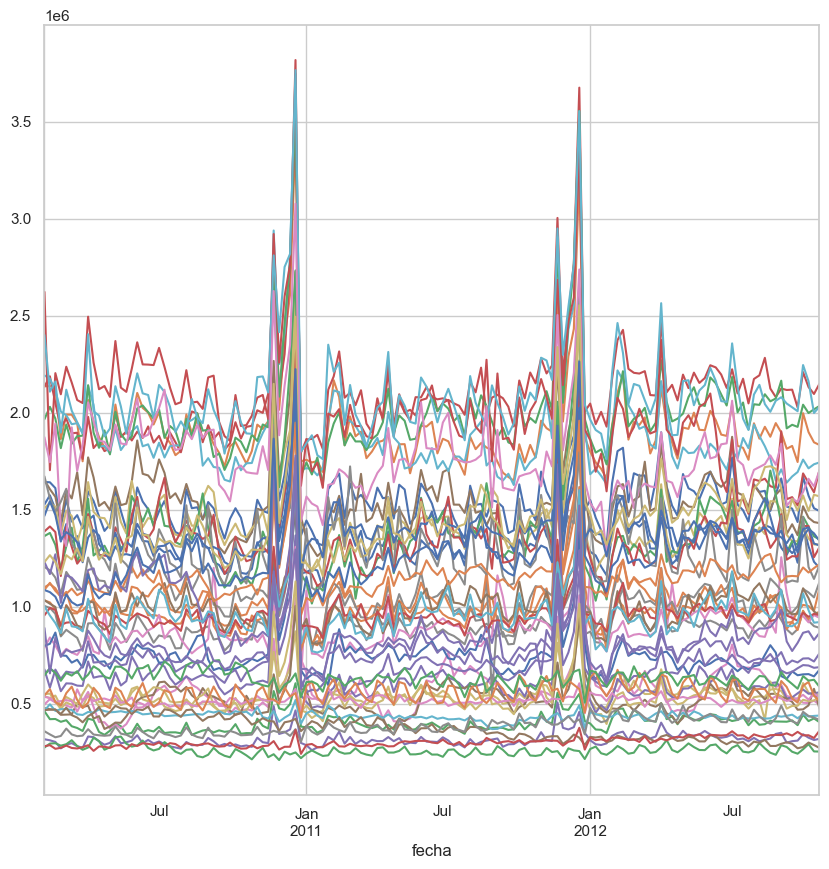

In [455]:
#Ventas semanales por tienda
plt.figure(figsize=(10,10))
for i in df1.tienda.unique():
    tienda_=df1[df1.tienda==i]
    tienda_['ventas_sem'].plot()

## 13.2 Ventas agregadas de todas las tiendas

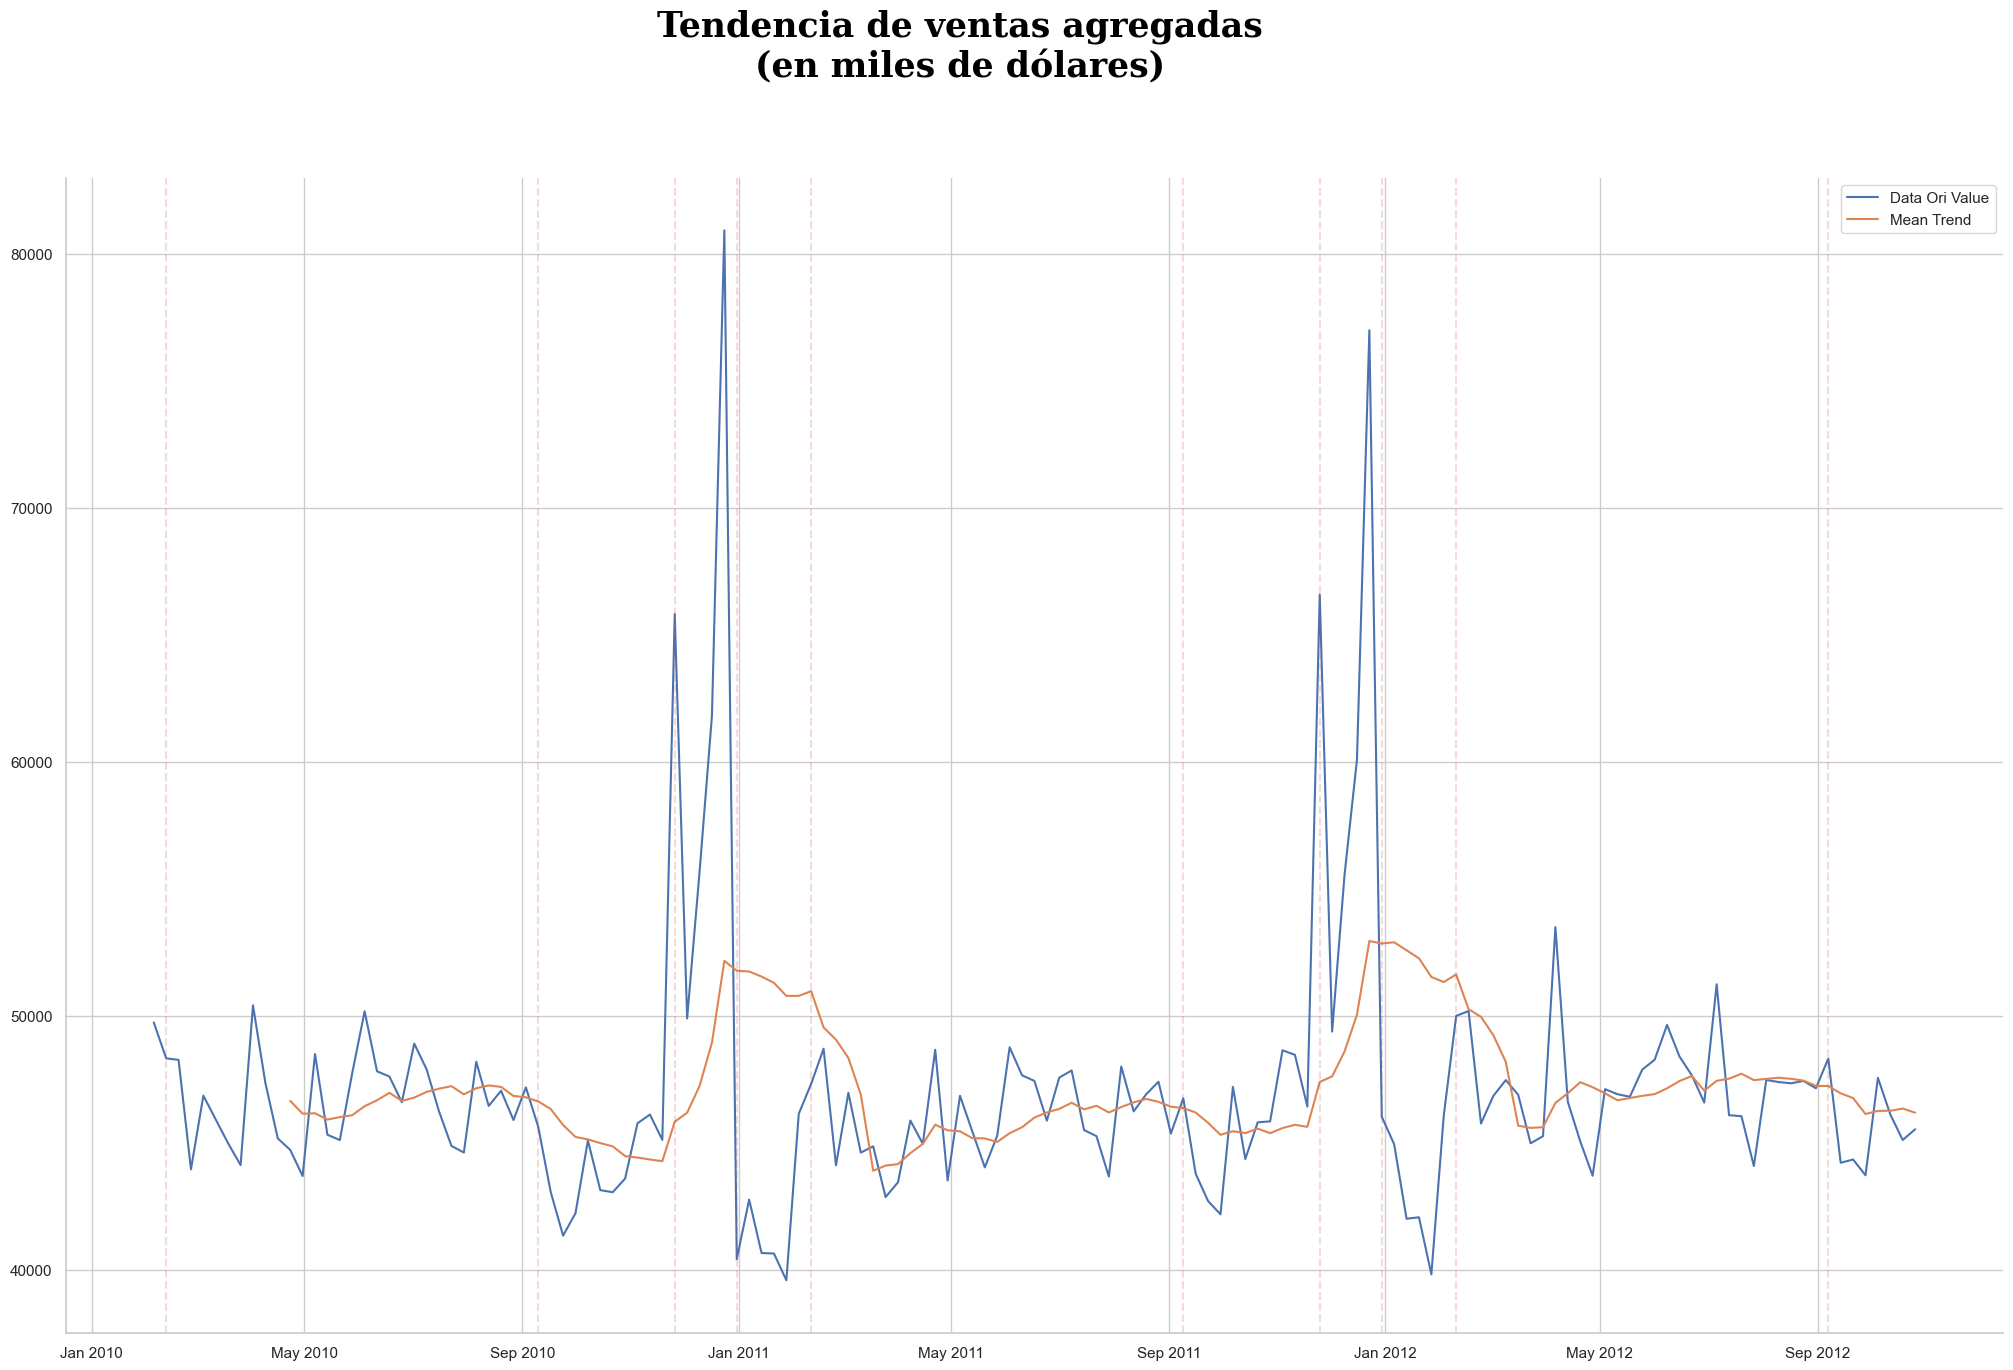

In [466]:
fecha_feriado = pd.to_datetime(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'])
locate = pd.to_datetime('2011-05-06')

agg_sales = panel.groupby('fecha')['ventas_sem'].sum().reset_index()

fig, ax = plt.subplots(1, 1, figsize = (25, 15))
sns.lineplot(x = agg_sales['fecha'], y = agg_sales['ventas_sem'], ax = ax, label = 'Data Ori Value')
sns.lineplot(x = agg_sales['fecha'], y = agg_sales['ventas_sem'].rolling(12).mean(), ax = ax, 
             label = 'Mean Trend')

for i in fecha_feriado:
    ax.axvline(i, color = 'r', alpha = 0.2, ls='--')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.text(locate, 87000, 'Tendencia de ventas agregadas\n(en miles de dólares)', fontsize = 25, 
        fontweight = 'bold', fontfamily = 'serif', color = 'black', ha = 'center')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_major_formatter(anios_format)

plt.show()

Del gráfico podemos interpretar que hay un componente estacional en la fecha de vacaciones (línea naranja). Las ventas aumentan rápidamente cuando hay un feriado. Mientras que en fechas no festivas, las ventas tienden a estar estancadas.

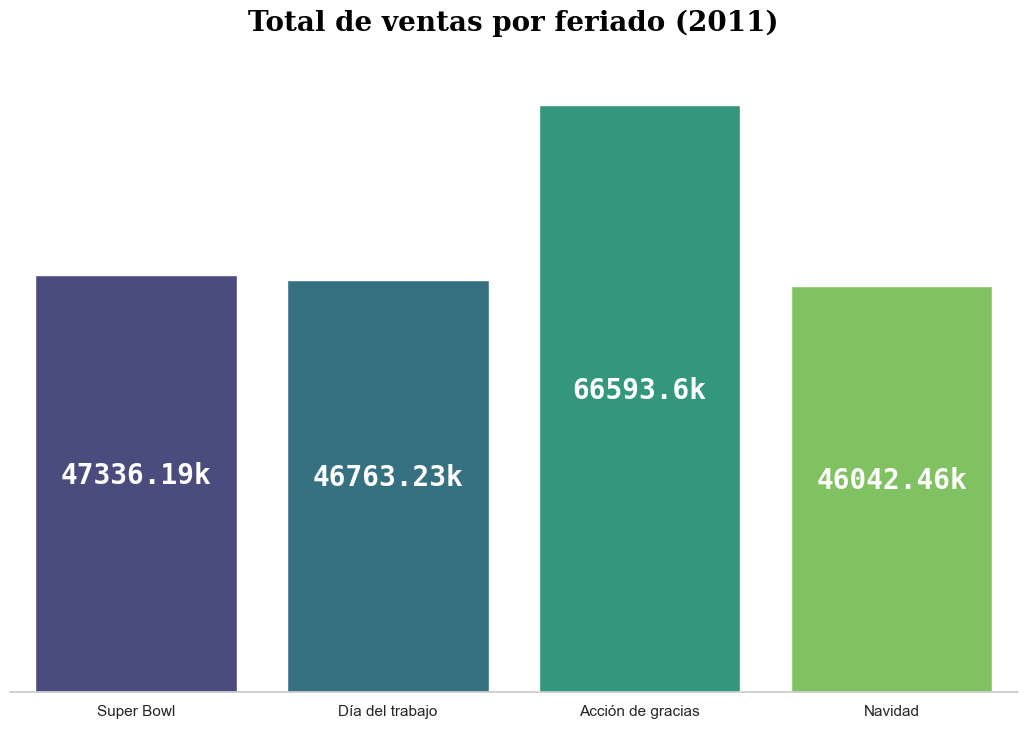

In [471]:
#Definición de feriados
super_bowl = ['2010-02-12', '2011-02-11', '2012-02-10']
dia_trabajo = ['2010-09-10', '2011-09-09', '2012-09-07']
accion_gracias = ['2010-11-26', '2011-11-25', '2012-11-23']
navidad = ['2010-12-31', '2011-12-30', '2012-12-28']

ventas_super_bowl = df[df['fecha'] == '2011-02-11']['ventas_sem'].sum()
ventas_dia_trabajo = df[df['fecha'] == '2011-09-09']['ventas_sem'].sum()
ventas_accion_gracias = df[df['fecha'] == '2011-11-25']['ventas_sem'].sum()
ventas_navidad = df[df['fecha'] == '2011-12-30']['ventas_sem'].sum()

data = {'Super Bowl': ventas_super_bowl,'Día del trabajo': ventas_dia_trabajo, 
        'Acción de gracias': ventas_accion_gracias,'Navidad': ventas_navidad}

ventas_feriado = round(pd.Series(data),2)

fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.barplot(x = ventas_feriado.index, y = ventas_feriado, ax = ax, palette = 'viridis')

for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
ax.set_yticks([])
ax.set_ylabel('')
for ind, val in enumerate(ventas_feriado):
    ax.text(x = ind, y = val/2, s = f'{str(val)}k', fontsize = 20, fontweight = 'bold', ha = 'center', 
            fontfamily = 'monospace', color = 'white')
ax.text(1.5, 75000, 'Total de ventas por feriado (2011)', fontsize = 20, fontweight = 'bold', 
            fontfamily = 'serif', color = 'black', ha = 'center')

plt.show()

Del gráfico podemos concluir que el feriado de Día de Acción de gracias es el que más ventas produce a la semana.

## 13.3 Desempeño de ventas por tienda

Text(7, 310000, 'Ventas totales de Walmart por tienda\n (en miles de dólares)')

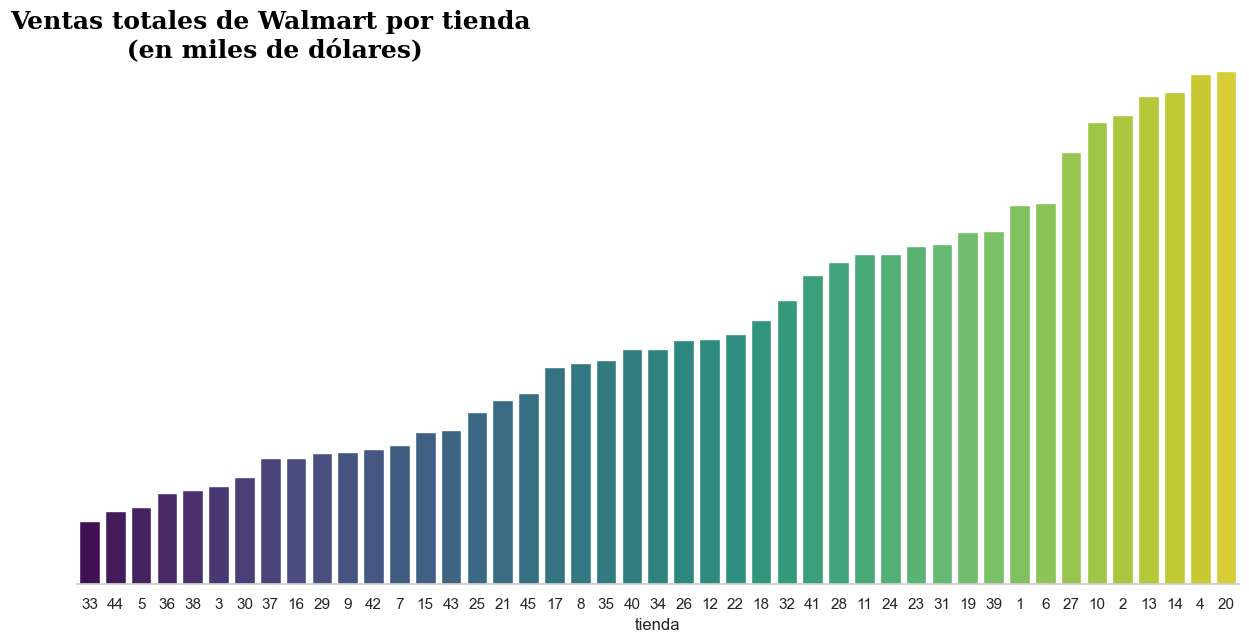

In [480]:
ventas_tienda = panel.groupby('tienda')['ventas_sem'].sum().reset_index()

fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.barplot(x='tienda', y='ventas_sem', data=ventas_tienda, order=ventas_tienda.sort_values('ventas_sem').tienda, ax = ax,
           palette = 'viridis')

for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
ax.set_yticks([])
ax.set_ylabel('')
ax.text(7, 310000, 'Ventas totales de Walmart por tienda\n (en miles de dólares)', fontsize = 18, fontweight = 'bold', 
        fontfamily = 'serif', color = 'black', ha = 'center')

Del gráfico podemos deducir que la tienda que más ventas ha generado es la número 20, seguido de la 4, 14, 13 y 2. Por otra parte, la tienda que menos ventas ha generado es la número 33 seguido de la 44, 5 y 36.

## 13.4 Análisis de la tienda de mayor ventas

In [576]:
tienda20=df1[df1.tienda==1]
tienda20

,tienda,fecha,ventas_sem,dia_festivo,temp_celsius,precio_comb,cpi,desempleo,mes,anio
fecha,,,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,Feb,2010
2010-02-12,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,Feb,2010
2010-02-19,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,Feb,2010
2010-02-26,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,Feb,2010
2010-03-05,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,Mar,2010
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1,2012-09-28,1437059.26,0,24.488889,3.666,222.981658,6.908,Sep,2012
2012-10-05,1,2012-10-05,1670785.97,0,20.305556,3.617,223.181477,6.573,Oct,2012
2012-10-12,1,2012-10-12,1573072.81,0,17.216667,3.601,223.381296,6.573,Oct,2012


<AxesSubplot:xlabel='fecha'>

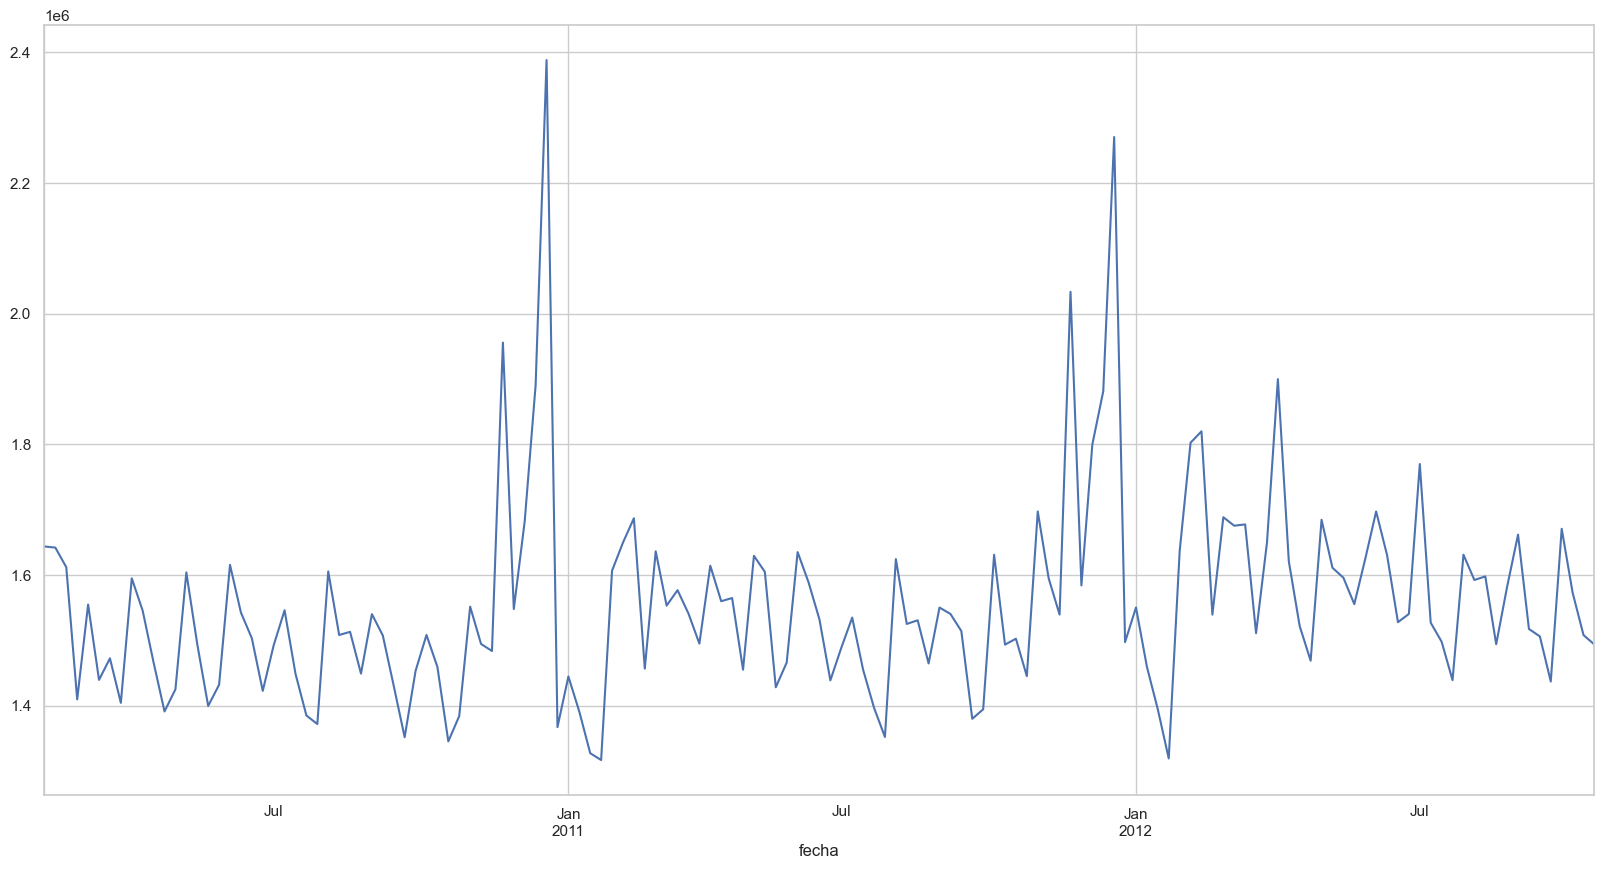

In [578]:
tienda20['ventas_sem'].plot()

## 13.5 Ventas mensuales y anuales de la tienda #20

In [580]:
mensual_ventas = pd.pivot_table(tienda20, values = "ventas_sem", columns = "anio", index = "mes")
mensual_ventas = mensual_ventas.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
mensual_ventas

anio,2010,2011,2012
mes,,,
Jan,NaN,1.370013e+06,1.430923e+06
Feb,1.576836e+06,1.599972e+06,1.699519e+06
Mar,1.467823e+06,1.576844e+06,1.640399e+06
Apr,1.484560e+06,1.537825e+06,1.627804e+06
May,1.482485e+06,1.532108e+06,1.611741e+06
Jun,1.521020e+06,1.548743e+06,1.604117e+06
Jul,1.448897e+06,1.445531e+06,1.558487e+06
Aug,1.518988e+06,1.536246e+06,1.579524e+06
Sep,1.457448e+06,1.475908e+06,1.530595e+06


<AxesSubplot:xlabel='mes'>

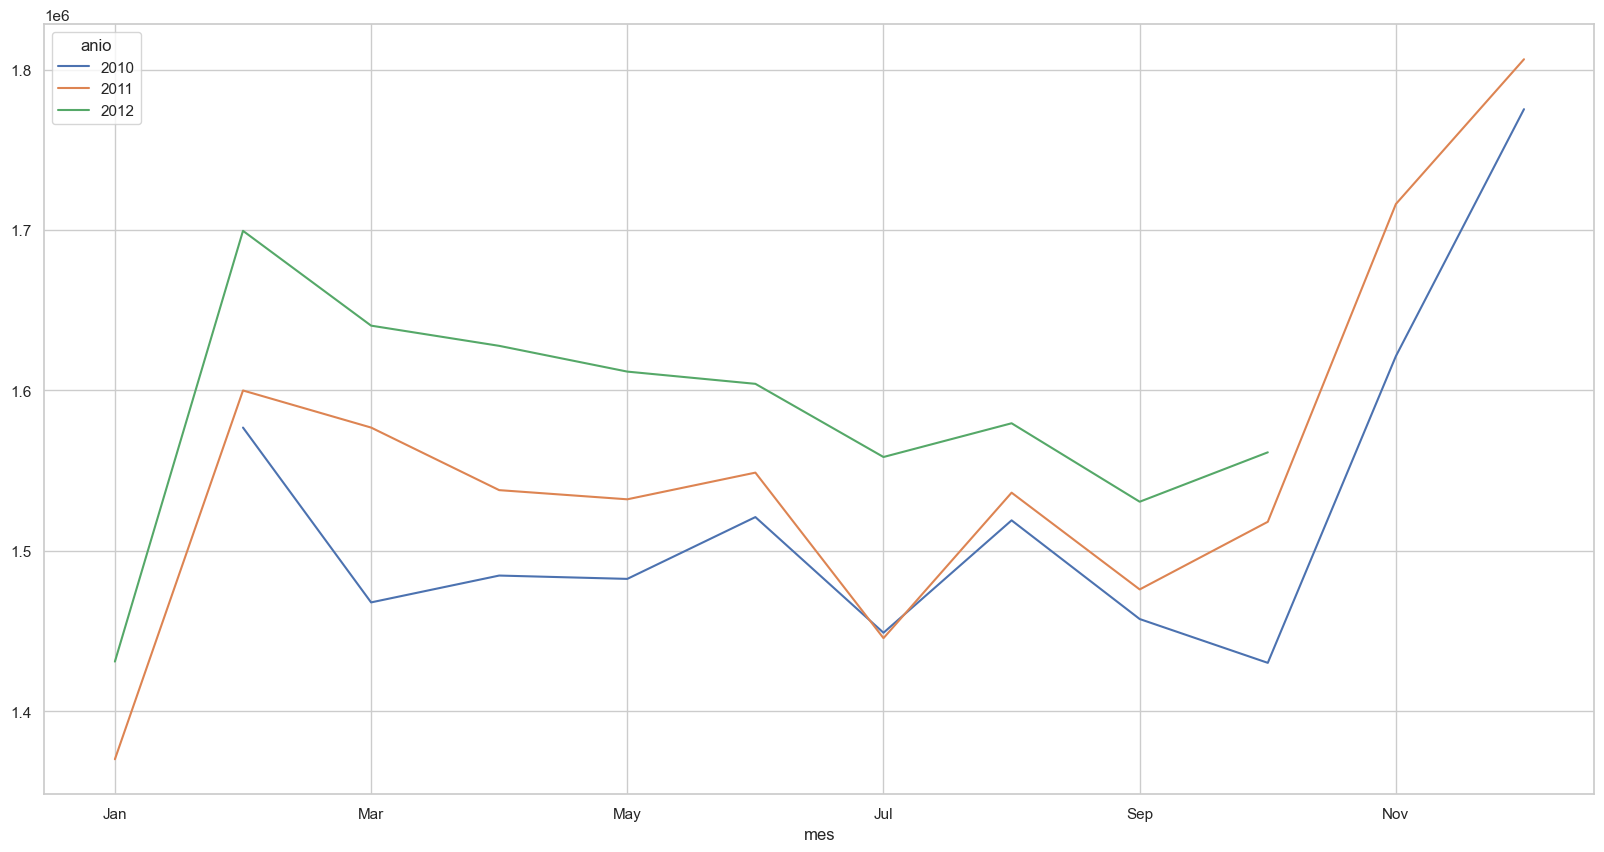

In [581]:
mensual_ventas.plot()

In [584]:
anual_ventas = pd.pivot_table(tienda20, values = "ventas_sem", columns = "mes", index = "anio")
anual_ventas = anual_ventas[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
anual_ventas

mes,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
anio,,,,,,,,,,,,
2010,NaN,1.576836e+06,1467823.495,1484560.384,1482484.660,1521020.365,1.448897e+06,1.518988e+06,1457448.480,1.430128e+06,1.621387e+06,1775390.636
2011,1.370013e+06,1.599972e+06,1576843.870,1537824.720,1532107.950,1548742.935,1.445531e+06,1.536246e+06,1475908.468,1.518082e+06,1.716243e+06,1806518.942
2012,1.430923e+06,1.699519e+06,1640399.480,1627803.705,1611740.615,1604116.568,1.558487e+06,1.579524e+06,1530595.380,1.561397e+06,NaN,NaN


<AxesSubplot:>

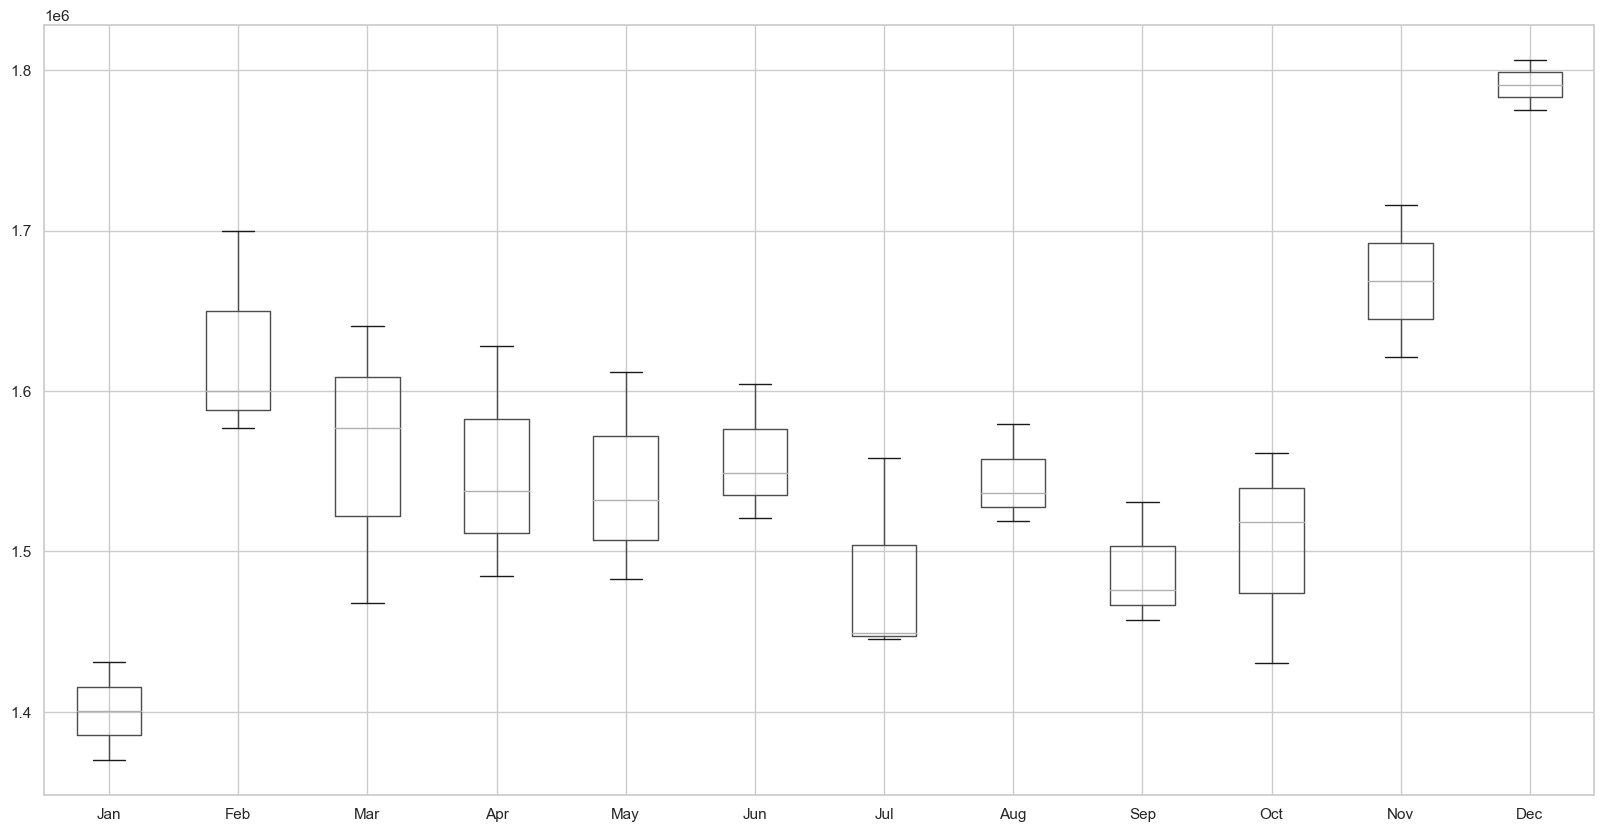

In [585]:
anual_ventas.boxplot()